In [1]:
from sklearn.datasets import load_breast_cancer # Dataset (from sklearn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = load_breast_cancer()

In [3]:
# data type of Bunch
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# The input features
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# The target labels
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [6]:
# split the data into train and test sets
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [7]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
# Build the TF model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=(X_train.shape[1],), activation='sigmoid'))

In [9]:
# compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
# Train the model
r = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 3s 202ms/step - loss: 1.5755 - accuracy: 0.2105 - val_loss: 1.4512 - val_accuracy: 0.1862
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 1.3773 - accuracy: 0.2537 - val_loss: 1.3280 - val_accuracy: 0.2287
Epoch 3/100
12/12 [==============================] - 0s 31ms/step - loss: 1.3249 - accuracy: 0.2779 - val_loss: 1.2120 - val_accuracy: 0.2660
Epoch 4/100
12/12 [==============================] - 0s 31ms/step - loss: 1.1710 - accuracy: 0.3197 - val_loss: 1.1063 - val_accuracy: 0.3138
Epoch 5/100
12/12 [==============================] - 0s 25ms/step - loss: 1.2351 - accuracy: 0.3160 - val_loss: 1.0059 - val_accuracy: 0.3564
Epoch 6/100
12/12 [==============================] - 0s 32ms/step - loss: 1.0435 - accuracy: 0.3379 - val_loss: 0.9183 - val_accuracy: 0.4202
Epoch 7/100
12/12 [==============================] - 0s 30ms/step - loss: 0.9366 - accuracy: 0.4311 - val_loss: 0.8400 - val_accuracy: 0.4681
Epoch

In [11]:
# evaluate the model
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 1ms/step - loss: 0.1272 - accuracy: 0.9633
Train score: [0.1272464245557785, 0.9632545709609985]
6/6 [==============================] - 0s 2ms/step - loss: 0.0903 - accuracy: 0.9840
Test score: [0.09027430415153503, 0.9840425252914429]


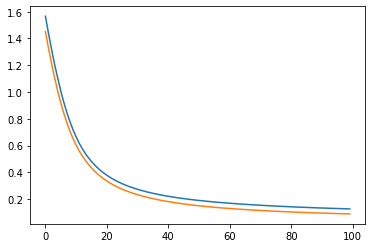

In [12]:
# Plot the loss per epoch
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='test_loss')

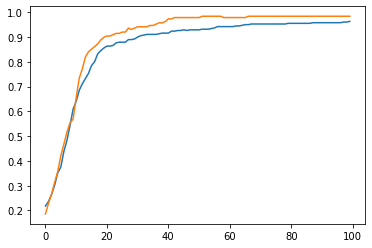

In [13]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='train_acc')
plt.plot(r.history['val_accuracy'], label='test_acc')